In [52]:
# Import all the required Library for the classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter



In [2]:
data = pd.read_excel("C:\\Users\\Jeevan Nagendra\\Documents\\Credic_card_default_project\\default of credit card clients.xls",header=0)

In [3]:
#Initially we will check if there are any missing value
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
#the data is in excel format so we will convert it into csv file
data.to_csv("default_credit.csv",index=False)

In [5]:
# Replace the headings
new_headings = ["ID","LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","Default"]
df= data.rename(columns=dict(zip(data.columns, new_headings)))

In [6]:
df = df.iloc[1:,]

In [7]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [38]:
print(df['Default'].value_counts())

0    23364
1     6636
Name: Default, dtype: int64


In [39]:
#In education and marraige is nominal data so we will do one hot encoding
def onehot_encode(df,column_dict):
    df = df.copy()
    for column,prefix in column_dict.items():
        dummies = pd.get_dummies(df[column],prefix=prefix)
        df = pd.concat([df,dummies],axis=1)
        df = df.drop(column,axis=1)
    return df


In [40]:
#Preprocessing

def  preprocess_inputs(df):
    #Split data into X and y
    df = df.copy()
    #Removing ID because its not giving any useful information
    df = df.drop('ID',axis=1)
    df = onehot_encode(df,
                       {
                       'EDUCATION':'EDU',
                       'MARRIAGE':'MAR'
                       }
                      )
    
    y = df['Default'].copy()
    X = df.drop('Default',axis=1).copy()
    #Scale X with standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
    return X,y

In [41]:
X,y=preprocess_inputs(df)

In [42]:
y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: Default, Length: 30000, dtype: int32

In [14]:
df2 = df.copy()

In [15]:
#Initially all the attributes will be in object format which is not feasible for data analysis and modelling so we convert it into int and float values
col_int=list(df.columns[0:12])
col_float = list(df.columns[12:-1])
col_int_last = [df.columns[-1]]

In [16]:
df[col_int] = df[col_int].astype(int)
df[col_float] = df[col_float].astype(float)
df[col_int_last] = df[col_int_last].astype(int)

In [37]:
df.dtypes

ID             int32
LIMIT_BAL      int32
SEX            int32
EDUCATION      int32
MARRIAGE       int32
AGE            int32
PAY_0          int32
PAY_2          int32
PAY_3          int32
PAY_4          int32
PAY_5          int32
PAY_6          int32
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
Default        int32
dtype: object

In [18]:
{column:len(X[column].unique()) for column in X.columns}

{'LIMIT_BAL': 81,
 'SEX': 2,
 'AGE': 56,
 'PAY_0': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'EDU_0': 2,
 'EDU_1': 2,
 'EDU_2': 2,
 'EDU_3': 2,
 'EDU_4': 2,
 'EDU_5': 2,
 'EDU_6': 2,
 'MAR_0': 2,
 'MAR_1': 2,
 'MAR_2': 2,
 'MAR_3': 2}

In [19]:
{'EDUCATION':'EDU'}.items()

dict_items([('EDUCATION', 'EDU')])

In [21]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

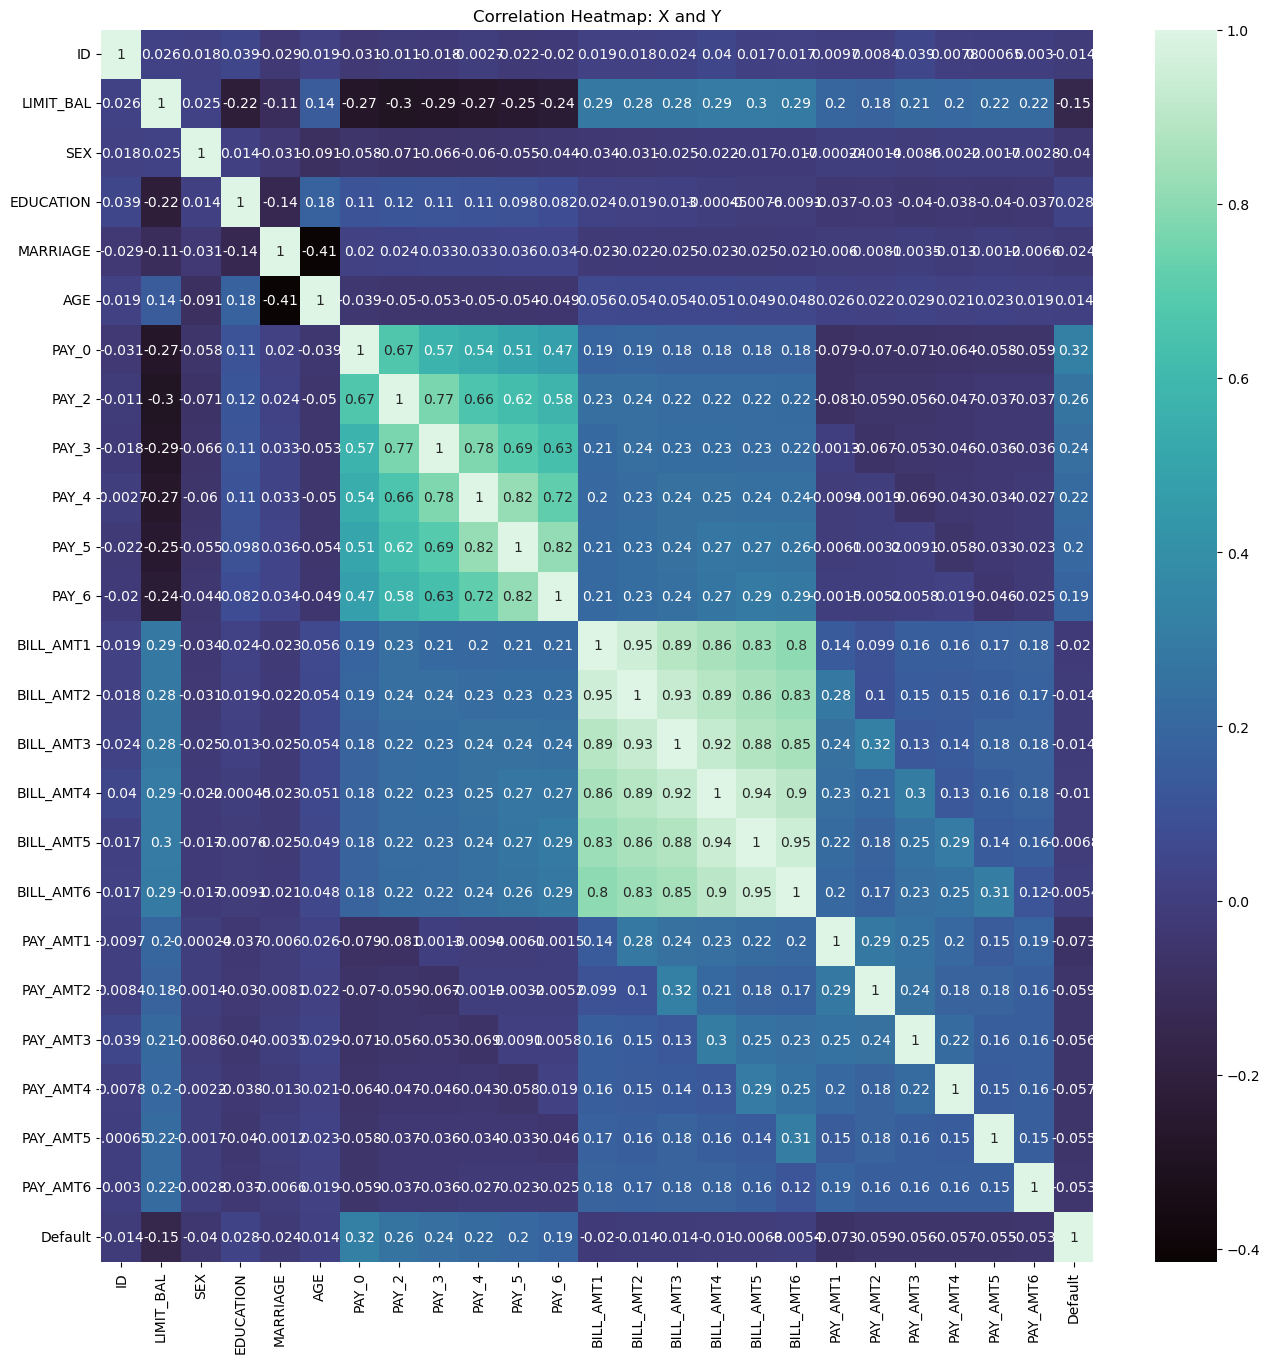

In [22]:
 #Visualization

correlation_matrix = df.corr()

# Check if the correlation matrix is empty or contains missing values
if correlation_matrix.empty or correlation_matrix.isnull().values.all():
    print("No valid correlation data available.")
else:
    # Plot the heatmap
    plt.figure(figsize=(16,16))
    sns.heatmap(correlation_matrix, annot=True, cmap='mako')
    plt.title('Correlation Heatmap: X and Y')
    plt.show()
    
#Correlation is high among PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6.

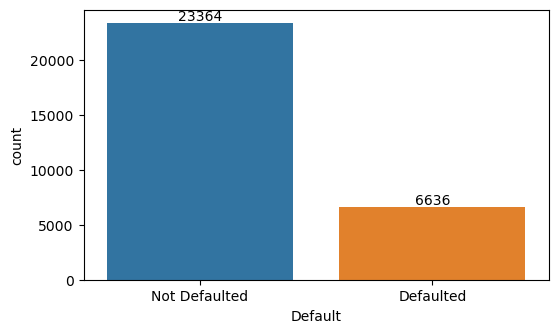

In [23]:
#We will visualize the target variable weather the data is balanced or imbalanced
plt.figure(figsize=(6,3.5))
ax=sns.countplot(x= df['Default'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Not Defaulted", "Defaulted"])
plt.show()

#the data is imbalanced which is about 22% of clients will default next month

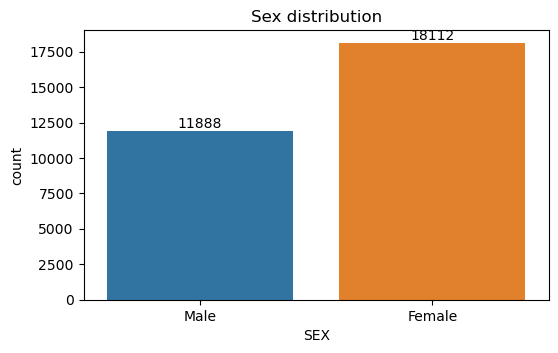

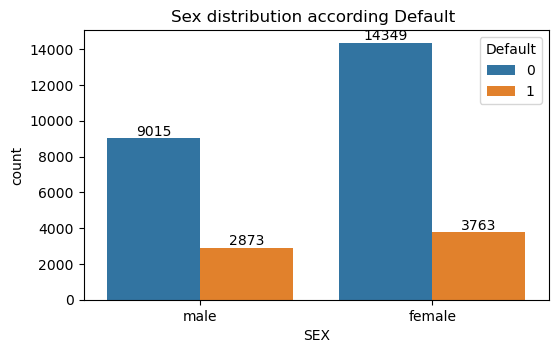

In [24]:
#SEX attribute check
plt.figure(figsize=[6,3.5])
ax=sns.countplot(x= df['SEX'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Sex distribution")
plt.show()

plt.figure(figsize=[6,3.5])
ax=sns.countplot(data=df, x="SEX", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["male", "female"])
plt.title("Sex distribution according Default ")
plt.show()

#More Female clients own credit card than male client
#24% of male clients fraud credit card while the ratio for female is around 20%

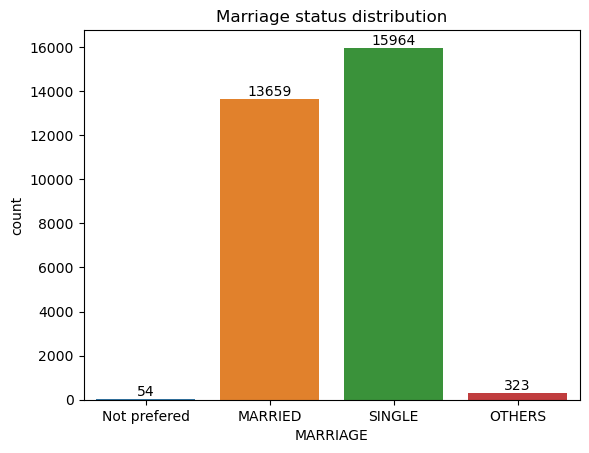

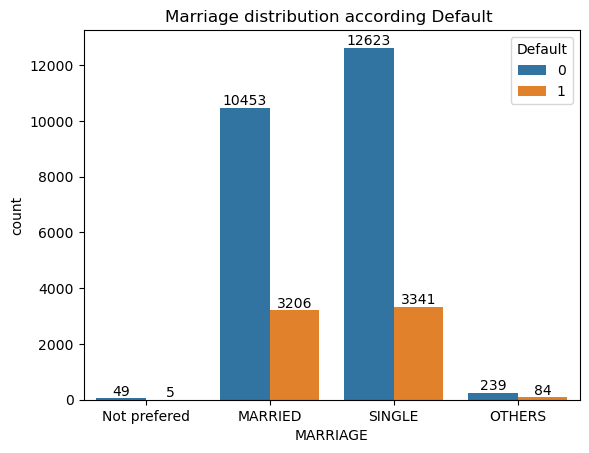

In [25]:
#Marriage Variable
ax=sns.countplot(x= df['MARRIAGE'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["Not prefered"
                              
                              ,"MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage status distribution")
plt.show()

ax=sns.countplot(data=df, x="MARRIAGE", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["Not prefered","MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage distribution according Default ")
plt.show()
#Single is the group which highest number of customers using credit cards(53%)
#Married people are the group which has highest fraud cases(30%)

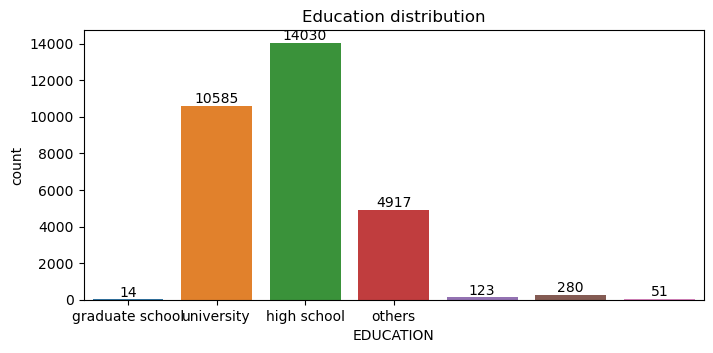

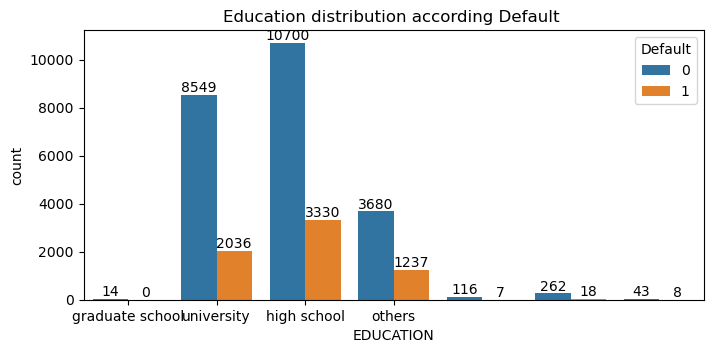

In [26]:
plt.figure(figsize=[8,3.5])
ax=sns.countplot(x= df['EDUCATION'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution")
plt.show()

plt.figure(figsize=[8,3.5])
ax=sns.countplot(data=df, x="EDUCATION", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution according Default ")
plt.show()

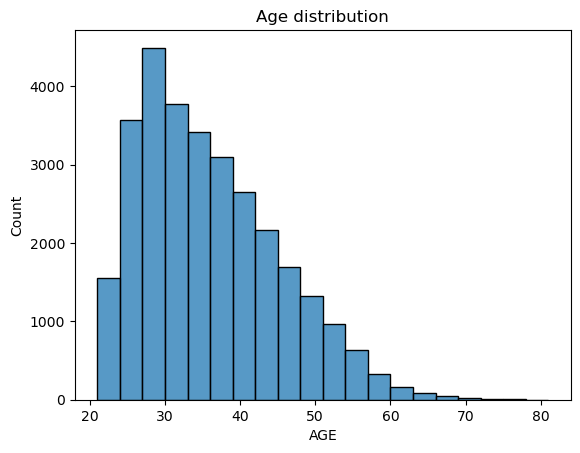

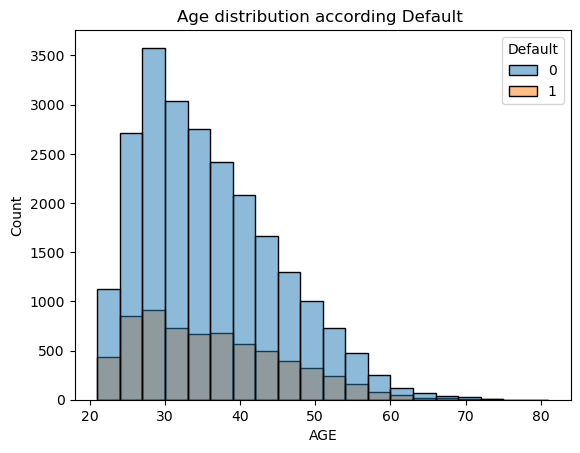

In [27]:
#Age Attribute
sns.histplot(data=df, x="AGE",binwidth=3)
plt.title("Age distribution")
plt.show()

sns.histplot(data=df, x="AGE", hue="Default", binwidth=3)
plt.title("Age distribution according Default ")
plt.show()

#Histogram is right-skewed meaning the older customers are less likely to use credit cards
#The main client is in their 30s
#Customers in their 30s are also the most prone to credit fraud

Balancing the data
The SMOTE algorithm works like this:

You select a random sample from the minority group. You will determine the k nearest neighbours for the observations in this sample. Then, using one of those neighbours, you will determine the vector between the current data point and the chosen neighbour. The vector is multiplied by a random number between 0 and 1. You add this to the current data point to get the synthetic data point. This operation is essentially the same as moving the data point slightly in the direction of its neighbour. This ensures that your synthetic data point is not an exact replica of an existing data point, while also ensuring that it is not too dissimilar from known observations in your minority class.

In [43]:
# Spliting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((24000, 32), (6000, 32))

In [36]:
y.unique()

array([1, 0], dtype=object)

In [47]:
#perform over-sampling the data using SMOTE
print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()

X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


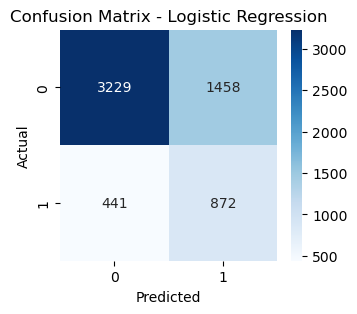

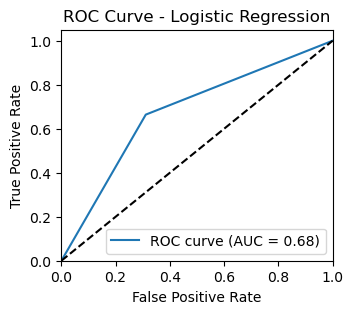

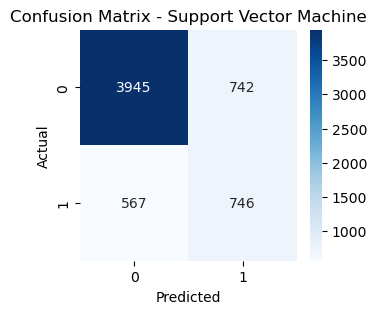

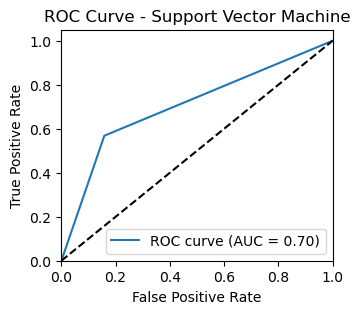

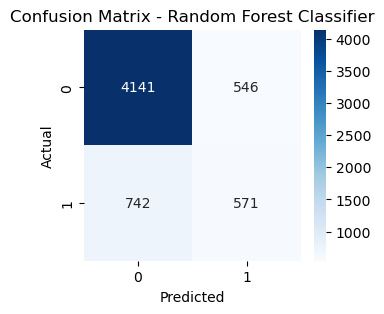

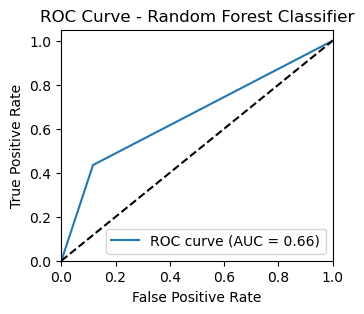

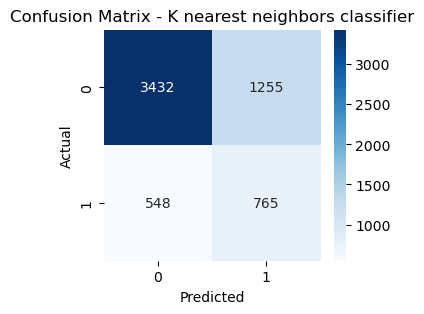

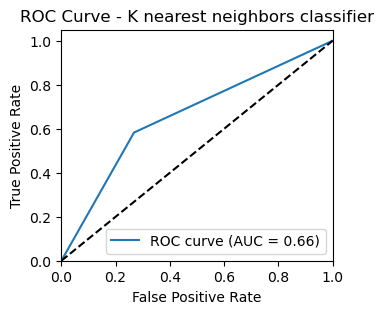

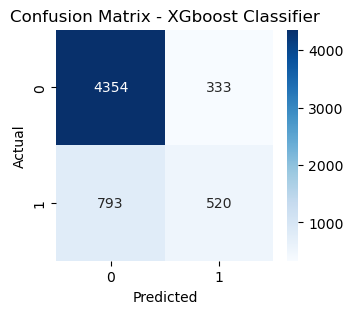

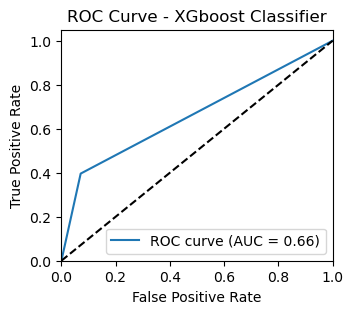

In [56]:
#Training 
from sklearn.metrics import roc_curve, auc
accuracies ={}
cm = {}
scoresSVC = {}
F1_score = {}
classification = {}
roc_auc = {}
models = {
    LogisticRegression(): 'Logistic Regression',
    SVC():    'Support Vector Machine',
    RandomForestClassifier(n_estimators =10): 'Random Forest Classifier',
    KNeighborsClassifier(n_neighbors=8): 'K nearest neighbors classifier',
    XGBClassifier(): 'XGboost Classifier'
    
    
    }

for model, name in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    cm[name] = confusion_matrix( y_test, y_pred )
    scoresSVC[name] = cross_val_score( model, X_train, y_train, cv=10)
    classification[name]=classification_report(y_test, y_pred)
    
    
    # Plot confusion matrix heatmap
    plt.figure(figsize=(3.5, 3))
    sns.heatmap(cm[name], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc[name] = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=[3.5,3])
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc[name]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

In [51]:
# Print the accuracies

for name,c in cm.items():
    print(f"Accuracy on Test Set for {name} = %.2f" % ((c[0,0] + c[1,1] )/len(X_test)))
for name,score in scoresSVC.items():
    print(print(f"Mean {name} CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (score.mean(), score.std() )))
for name,classes in classification.items():
    print(f"Classification report of {name} is {classes}")
# Print ROC AUC values
for name, auc_value in roc_auc.items():
    print(f"AUC for {name}: {auc_value:.2f}")

Accuracy on Test Set for Logistic Regression = 0.68
Accuracy on Test Set for Support Vector Machine = 0.78
Accuracy on Test Set for Random Forest Classifier = 0.78
Accuracy on Test Set for K nearest neighbors classifier = 0.70
Accuracy on Test Set for XGboost Classifier = 0.81
Mean Logistic Regression CrossVal Accuracy on Train Set 0.67, with std=0.00
None
Mean Support Vector Machine CrossVal Accuracy on Train Set 0.71, with std=0.01
None
Mean Random Forest Classifier CrossVal Accuracy on Train Set 0.84, with std=0.06
None
Mean K nearest neighbors classifier CrossVal Accuracy on Train Set 0.78, with std=0.02
None
Mean XGboost Classifier CrossVal Accuracy on Train Set 0.86, with std=0.13
None
Classification report of Logistic Regression is               precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.66      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.68